<a href="https://colab.research.google.com/github/kuks2309/2022-class/blob/main/average_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [ ]:
def get_volt():
    """Measure voltage."""
    v = np.random.normal(0, 4)  # v: measurement noise.
    volt_mean = 14.4            # volt_mean: mean (nominal) voltage [V].
    volt_meas = volt_mean + v   # volt_meas: measured voltage [V] (observable).
    return volt_meas

In [ ]:
def avg_filter(k, x_meas, x_avg):
    """Calculate average voltage using a average filter."""
    alpha = (k - 1) / k
    x_avg = alpha * x_avg + (1 - alpha) * x_meas
    return x_avg

In [ ]:
# Input parameters.
time_end = 10
dt = 0.2

In [ ]:
time = np.arange(0, time_end, dt)
n_samples = len(time)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [ ]:
x_avg = 0
for i in range(n_samples):
    k = i + 1
    x_meas = get_volt()
    x_avg = avg_filter(k, x_meas, x_avg)

    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

Text(0, 0.5, 'Volt [V]')

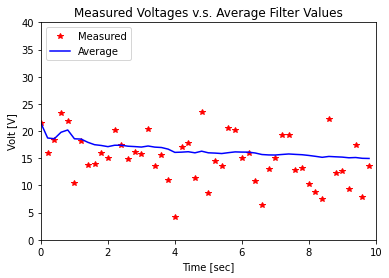

In [ ]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Average')
plt.legend(loc='upper left')
plt.title('Measured Voltages v.s. Average Filter Values')
plt.axis((0,10 ,0,40))
plt.xlabel('Time [sec]')
plt.ylabel('Volt [V]')
#plt.savefig('png/average_filter.png')